<a href="https://colab.research.google.com/github/AndreaPoteYong/MINERIA_DE_DATOS/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA**
Andrea Carolina Pote Yong

LIBRERÍAS

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

DESCARGAR DATASET

In [2]:

print("Descargando dataset...")
path = kagglehub.dataset_download("amar5693/student-performance-dataset")
print("Ruta del dataset:", path)

files = os.listdir(path)
print("Archivos encontrados:", files)

file_path = os.path.join(path, files[0])
df = pd.read_csv(file_path)


Descargando dataset...
Using Colab cache for faster access to the 'student-performance-dataset' dataset.
Ruta del dataset: /kaggle/input/student-performance-dataset
Archivos encontrados: ['ultimate_student_productivity_dataset_5000.csv']


VISIÓN GENERAL DEL DATASET

In [3]:
print("\nDimensiones del dataset:", df.shape)

print("\nPrimeras filas:")
print(df.head())

print("\nInformación general:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())



Dimensiones del dataset: (5000, 21)

Primeras filas:
   student_id  age gender academic_level  study_hours  self_study_hours  \
0           1   18  Other    High School         7.64              1.56   
1           2   18  Other    High School         2.21              2.22   
2           3   22   Male    High School         3.45              0.00   
3           4   17  Other    High School         5.75              2.08   
4           5   19  Other    High School         6.83              1.72   

   online_classes_hours  social_media_hours  gaming_hours  sleep_hours  ...  \
0                  2.20                3.05          2.19         6.52  ...   
1                  2.10                1.65          2.55         5.97  ...   
2                  0.29                1.34          2.08         8.39  ...   
3                  3.01                2.27          2.20         6.31  ...   
4                  3.33                2.65          0.70         8.01  ...   

   exercise_minutes 

El dataset presenta información de 5000 estudiantes sin valores faltantes. Se observa que los estudiantes tienen un promedio de 4.5 horas de estudio diario, pero también casi 3 horas en redes sociales. El nivel promedio de salud mental es moderado (5.5/10), mientras que el burnout promedio es considerable (45/100). El puntaje promedio del examen es relativamente bajo (18.8).

VALORES NULOS

In [4]:
print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nPorcentaje de nulos:")
print((df.isnull().sum() / len(df)) * 100)


Valores nulos por columna:
student_id              0
age                     0
gender                  0
academic_level          0
study_hours             0
self_study_hours        0
online_classes_hours    0
social_media_hours      0
gaming_hours            0
sleep_hours             0
screen_time_hours       0
exercise_minutes        0
caffeine_intake_mg      0
part_time_job           0
upcoming_deadline       0
internet_quality        0
mental_health_score     0
focus_index             0
burnout_level           0
productivity_score      0
exam_score              0
dtype: int64

Porcentaje de nulos:
student_id              0.0
age                     0.0
gender                  0.0
academic_level          0.0
study_hours             0.0
self_study_hours        0.0
online_classes_hours    0.0
social_media_hours      0.0
gaming_hours            0.0
sleep_hours             0.0
screen_time_hours       0.0
exercise_minutes        0.0
caffeine_intake_mg      0.0
part_time_job           0.0

El dataset no presenta valores nulos en ninguna de sus 21 variables

VARIABLES NUMÉRICAS Y CATEGÓRICAS

In [5]:
print("\nVariables numéricas:")
print(df.select_dtypes(include=['int64', 'float64']).columns)

print("\nVariables categóricas:")
print(df.select_dtypes(include=['object']).columns)


Variables numéricas:
Index(['student_id', 'age', 'study_hours', 'self_study_hours',
       'online_classes_hours', 'social_media_hours', 'gaming_hours',
       'sleep_hours', 'screen_time_hours', 'exercise_minutes',
       'caffeine_intake_mg', 'part_time_job', 'upcoming_deadline',
       'mental_health_score', 'focus_index', 'burnout_level',
       'productivity_score', 'exam_score'],
      dtype='object')

Variables categóricas:
Index(['gender', 'academic_level', 'internet_quality'], dtype='object')


DISTRIBUCIÓN VARIABLE OBJETIVO

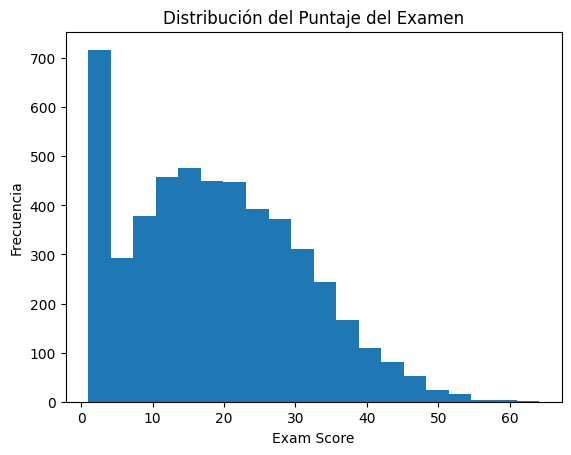

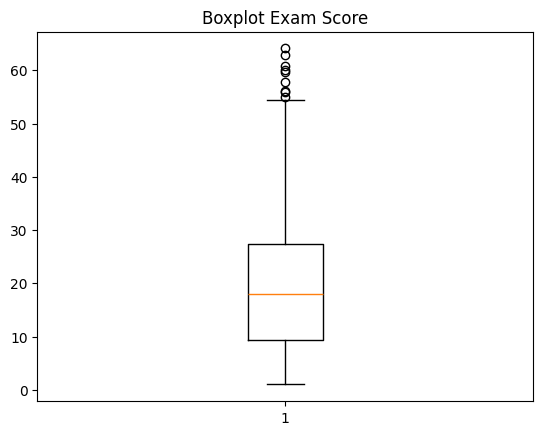

In [13]:
if "exam_score" in df.columns:

    plt.figure()
    plt.hist(df["exam_score"], bins=20)
    plt.title("Distribución del Puntaje del Examen")
    plt.xlabel("Exam Score")
    plt.ylabel("Frecuencia")
    plt.show()

    plt.figure()
    plt.boxplot(df["exam_score"])
    plt.title("Boxplot Exam Score")
    plt.show()

La distribución del puntaje del examen presenta asimetría positiva, con concentración en valores bajos y medianos. La mediana se sitúa alrededor de 18 puntos, lo que confirma un rendimiento general moderado. Se identifican varios valores atípicos superiores, correspondientes a estudiantes con desempeño sobresaliente.

DISTRIBUCIÓN VARIABLES NUMÉRICAS


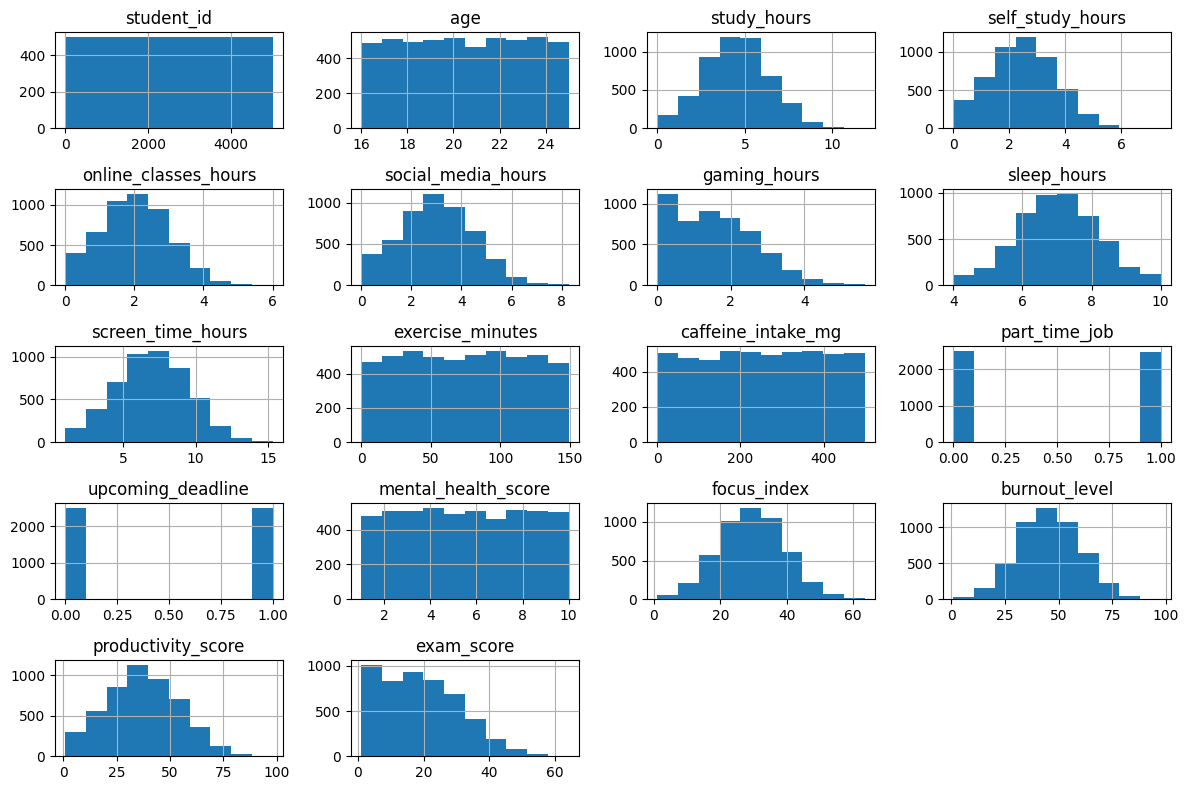

In [7]:
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

1. La mayoría tiene entre 18 y 23 años, es un grupo Joven.
2. La mayoría estudia entre 3 y 6 horas al día.
3. La mayoría estudia sola entre 1 y 4 horas
4. Muchos estudiantes usan redes entre 2 y 4 horas al día.
5. Juegan poco los videojuegos.
6. La mayoria duerme de 6 a 8 horas.
7. Muchos pasan entre 5 y 9 horas frente a pantallas
8. Hay estudiantes que no hacen ejercicio y otros que hacen bastante
9. Muchos consumen bastante cafeína
10. Casi la mitad trabaja.
11. Muchos estudiantes tienen niveles medios-altos de agotamiento
12. La mayoría tiene productividad media
13. La mayoría saca entre 10 y 30 puntos en el examen.


MATRIZ DE CORRELACION

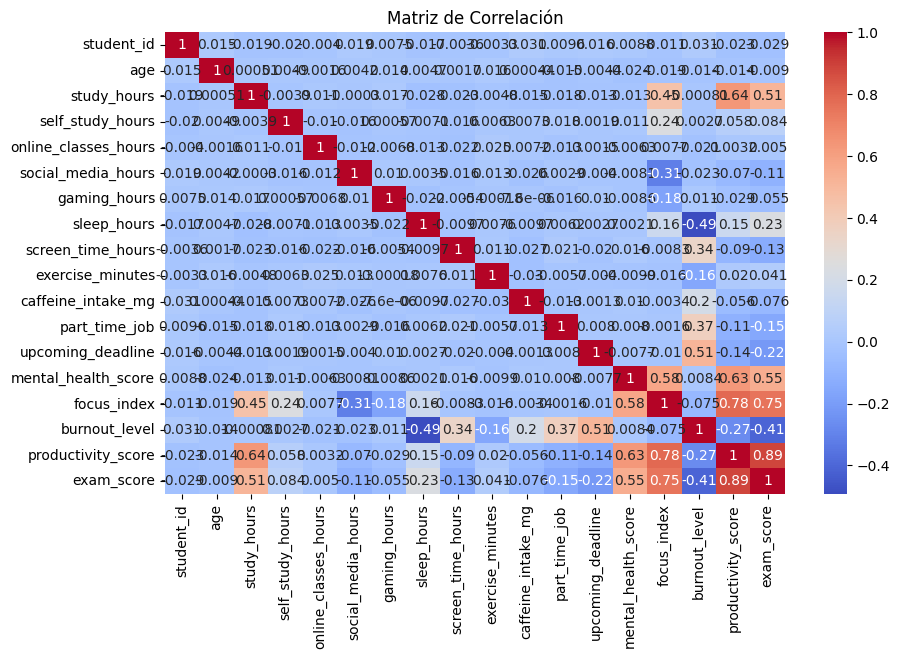

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

El análisis de correlación muestra que la variable con mayor influencia sobre el rendimiento académico es la productividad (r=0.89), seguida del índice de concentración (r=0.75). Las horas de estudio y la salud mental también presentan relaciones positivas significativas. Por el contrario, el nivel de burnout muestra una correlación negativa moderada (-0.41),

ANÁLISIS POR CATEGORÍAS

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\nDistribución de {col}:")
    print(df[col].value_counts())

    if "Exam_Score" in df.columns:
        print(f"\nPromedio Exam Score por {col}:")
        print(df.groupby(col)["Exam_Score"].mean())


Distribución de gender:
gender
Male      1719
Other     1651
Female    1630
Name: count, dtype: int64

Distribución de academic_level:
academic_level
Postgraduate     1687
High School      1672
Undergraduate    1641
Name: count, dtype: int64

Distribución de internet_quality:
internet_quality
Good       1722
Poor       1640
Average    1638
Name: count, dtype: int64


Las variables categóricas presentan una distribución equilibrada entre sus categorías. No se observan desbalances significativos en género, nivel académico o calidad de internet.

DETECCIÓN DE OUTLIERS (IQR)

In [10]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\nOutliers detectados en {col}: {outliers.shape[0]}")

print("\nEDA finalizado correctamente.")


Outliers detectados en student_id: 0

Outliers detectados en age: 0

Outliers detectados en study_hours: 17

Outliers detectados en self_study_hours: 13

Outliers detectados en online_classes_hours: 13

Outliers detectados en social_media_hours: 22

Outliers detectados en gaming_hours: 18

Outliers detectados en sleep_hours: 0

Outliers detectados en screen_time_hours: 15

Outliers detectados en exercise_minutes: 0

Outliers detectados en caffeine_intake_mg: 0

Outliers detectados en part_time_job: 0

Outliers detectados en upcoming_deadline: 0

Outliers detectados en mental_health_score: 0

Outliers detectados en focus_index: 24

Outliers detectados en burnout_level: 17

Outliers detectados en productivity_score: 8

Outliers detectados en exam_score: 9

EDA finalizado correctamente.


Se detectaron valores atípicos principalmente en variables relacionadas con hábitos académicos y digitales, como horas de estudio, uso de redes sociales y gaming. También se observaron outliers en el nivel de concentración y burnout.